In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

In [3]:
#importing dataset
df = pd.read_csv("C:/Users/Desktop/Desktop/Dissertation/snp500/stock_dfs/IBM.csv")

In [4]:
#current shape of an array
df.shape

(4800, 7)

In [5]:
# First 5 rows of IBM 
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,116.0000,111.875,112.4375,116.0000,10347700.0,80.076149
1,2000-01-04,114.5000,110.875,114.0000,112.0625,8227800.0,77.358032
2,2000-01-05,119.7500,112.125,112.9375,116.0000,12733200.0,80.076149
3,2000-01-06,118.9375,113.500,118.0000,114.0000,7971900.0,78.695503
4,2000-01-07,117.9375,110.625,117.2500,113.5000,11856700.0,78.350372


In [6]:
# Add Feature to dataset as i.e. Extracting Year and Month from Date Column
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [7]:
# Last 5 rows with Year & Month column
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,year,month
4795,2019-01-25,134.440002,132.429993,132.869995,133.970001,5707400.0,133.970001,2019,1
4796,2019-01-28,134.809998,132.580002,133.100006,134.270004,5357700.0,134.270004,2019,1
4797,2019-01-29,135.410004,133.600006,134.289993,134.330002,5037100.0,134.330002,2019,1
4798,2019-01-30,135.029999,133.250000,134.000000,134.380005,4500900.0,134.380005,2019,1
4799,2019-01-31,134.720001,133.740005,134.449997,134.419998,4884000.0,134.419998,2019,1


In [8]:
#Setting index as Date and create new dataframe to use as target variable for Adj Close
df.index = df['Date']
df_adjclose = df['Adj Close']

In [9]:
#Plotting 
trace = go.Scatter(
    x = df.index,
    y = df_adjclose, mode = 'lines'
)
data = [trace]
layout = dict(title = 'IBM',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Adj Close'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='IBM_adjclose')

D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



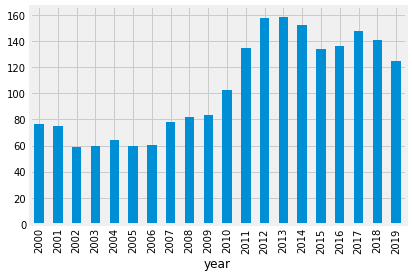

In [10]:
#Plot with mean and year
df.groupby('year')['Adj Close'].mean().plot.bar()

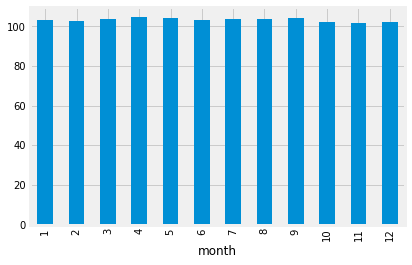

In [11]:
#Plot - Month
df.groupby('month')['Adj Close'].mean().plot.bar()

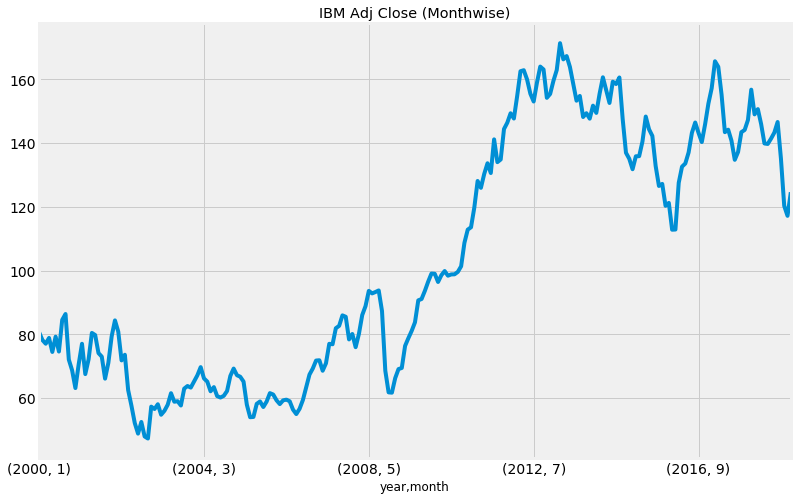

In [12]:
#Plot Year & Month
temp_my = df.groupby(['year', 'month'])['Adj Close'].mean()
temp_my.plot(figsize =(12,8), title = "IBM Adj Close (Monthwise)", fontsize = 14)

In [9]:
#split into train and validation
train = df[:4750]
valid = df[4750:]

In [10]:
train.shape, valid.shape

((4750, 9), (50, 9))

In [11]:
train.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,year,month
Date,,,,,,,,,
2018-11-09,2018-11-09,124.570000,121.959999,123.610001,123.540001,6961800.0,123.540001,2018,11
2018-11-12,2018-11-12,123.570000,120.650002,123.500000,120.900002,5379100.0,120.900002,2018,11
2018-11-13,2018-11-13,122.250000,119.900002,121.190002,120.839996,4084400.0,120.839996,2018,11
2018-11-14,2018-11-14,121.930000,119.769997,121.110001,120.199997,4762300.0,120.199997,2018,11
2018-11-15,2018-11-15,121.440002,119.510002,119.660004,121.440002,5207900.0,121.440002,2018,11


In [12]:
valid.head()

,Date,High,Low,Open,Close,Volume,Adj Close,year,month
Date,,,,,,,,,
2018-11-16,2018-11-16,121.849998,120.540001,120.889999,121.570000,4076300.0,121.570000,2018,11
2018-11-19,2018-11-19,122.180000,119.769997,121.629997,120.309998,4131200.0,120.309998,2018,11
2018-11-20,2018-11-20,119.489998,116.699997,118.489998,117.199997,6233800.0,117.199997,2018,11
2018-11-21,2018-11-21,119.510002,117.389999,117.610001,118.570000,5335800.0,118.570000,2018,11
2018-11-23,2018-11-23,118.339996,116.910004,118.089996,117.190002,2334700.0,117.190002,2018,11


In [17]:
trace0 = go.Scatter(x = train.index, y=train['Adj Close'], mode = 'lines', name ='Train')
trace1 = go.Scatter(x = valid.index, y=valid['Adj Close'], mode = 'lines', name = 'Valid')
data = [trace0, trace1]
layout = dict(title = 'Train and Validation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Adj Close'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='trainvalid')


In [18]:
#Moving Average
#Case 1
moving_avg = valid.copy()
moving_avg['moving_average_forecast'] = train['Adj Close'].rolling(7).mean().iloc[-1]
print(moving_avg)

rmse = np.sqrt(mean_squared_error(valid['Adj Close'], moving_avg['moving_average_forecast']))
rmse

                  Date        High         Low        Open       Close  \
Date                                                                     
2018-11-16  2018-11-16  121.849998  120.540001  120.889999  121.570000   
2018-11-19  2018-11-19  122.180000  119.769997  121.629997  120.309998   
2018-11-20  2018-11-20  119.489998  116.699997  118.489998  117.199997   
2018-11-21  2018-11-21  119.510002  117.389999  117.610001  118.570000   
2018-11-23  2018-11-23  118.339996  116.910004  118.089996  117.190002   
2018-11-26  2018-11-26  120.250000  118.059998  118.370003  119.559998   
2018-11-27  2018-11-27  120.040001  118.370003  118.379997  120.029999   
2018-11-28  2018-11-28  123.089996  120.220001  121.010002  123.000000   
2018-11-29  2018-11-29  123.120003  121.400002  122.440002  121.480003   
2018-11-30  2018-11-30  124.690002  121.480003  121.660004  124.269997   
2018-12-03  2018-12-03  126.589996  124.360001  125.669998  125.309998   
2018-12-04  2018-12-04  124.919998  12

6.478440016504363

In [19]:
trace0 = go.Scatter(x = train.index, y=train['Adj Close'], mode = 'lines', name ='Train')
trace1 = go.Scatter(x = valid.index, y=valid['Adj Close'], mode = 'lines', name = 'Valid')
trace2 = go.Scatter(x = valid.index, y=moving_avg['moving_average_forecast'], mode = 'lines', name = 'Moving Average')
data = [trace0, trace1, trace2]
layout = dict(title = 'Moving Average (Window Size = 7)',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Adj Close'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='movingavg7')

D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [20]:
#Moving Average - Case 2
moving_avg = valid.copy()
moving_avg['moving_average_forecast'] = train['Adj Close'].rolling(20).mean().iloc[-1]
print(moving_avg)
rmse = np.sqrt(mean_squared_error(valid['Adj Close'], moving_avg['moving_average_forecast']))
rmse

                  Date        High         Low        Open       Close  \
Date                                                                     
2018-11-16  2018-11-16  121.849998  120.540001  120.889999  121.570000   
2018-11-19  2018-11-19  122.180000  119.769997  121.629997  120.309998   
2018-11-20  2018-11-20  119.489998  116.699997  118.489998  117.199997   
2018-11-21  2018-11-21  119.510002  117.389999  117.610001  118.570000   
2018-11-23  2018-11-23  118.339996  116.910004  118.089996  117.190002   
2018-11-26  2018-11-26  120.250000  118.059998  118.370003  119.559998   
2018-11-27  2018-11-27  120.040001  118.370003  118.379997  120.029999   
2018-11-28  2018-11-28  123.089996  120.220001  121.010002  123.000000   
2018-11-29  2018-11-29  123.120003  121.400002  122.440002  121.480003   
2018-11-30  2018-11-30  124.690002  121.480003  121.660004  124.269997   
2018-12-03  2018-12-03  126.589996  124.360001  125.669998  125.309998   
2018-12-04  2018-12-04  124.919998  12

6.417780171353913

In [21]:
#Moving Average - Case 2 Plot
trace0 = go.Scatter(x = train.index, y=train['Adj Close'], mode = 'lines', name ='Train')
trace1 = go.Scatter(x = valid.index, y=valid['Adj Close'], mode = 'lines', name = 'Valid')
trace2 = go.Scatter(x = valid.index, y=moving_avg['moving_average_forecast'], mode = 'lines', name = 'Moving Average')
data = [trace0, trace1, trace2]
layout = dict(title = 'Moving Average (Window Size = 20)',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Adj Close'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='movingavg20')

D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [22]:
#Moving Average - Case 3
moving_avg = valid.copy()
moving_avg['moving_average_forecast']= train['Adj Close'].rolling(50).mean().iloc[-1]
print(moving_avg)

rmse = np.sqrt(mean_squared_error(valid['Adj Close'], moving_avg['moving_average_forecast']))
rmse

                  Date        High         Low        Open       Close  \
Date                                                                     
2018-11-16  2018-11-16  121.849998  120.540001  120.889999  121.570000   
2018-11-19  2018-11-19  122.180000  119.769997  121.629997  120.309998   
2018-11-20  2018-11-20  119.489998  116.699997  118.489998  117.199997   
2018-11-21  2018-11-21  119.510002  117.389999  117.610001  118.570000   
2018-11-23  2018-11-23  118.339996  116.910004  118.089996  117.190002   
2018-11-26  2018-11-26  120.250000  118.059998  118.370003  119.559998   
2018-11-27  2018-11-27  120.040001  118.370003  118.379997  120.029999   
2018-11-28  2018-11-28  123.089996  120.220001  121.010002  123.000000   
2018-11-29  2018-11-29  123.120003  121.400002  122.440002  121.480003   
2018-11-30  2018-11-30  124.690002  121.480003  121.660004  124.269997   
2018-12-03  2018-12-03  126.589996  124.360001  125.669998  125.309998   
2018-12-04  2018-12-04  124.919998  12

16.103939522264337

In [23]:
trace0 = go.Scatter(x = train.index, y=train['Adj Close'], mode = 'lines', name ='Train')
trace1 = go.Scatter(x = valid.index, y=valid['Adj Close'], mode = 'lines', name = 'Valid')
trace2 = go.Scatter(x = valid.index, y=moving_avg['moving_average_forecast'], mode = 'lines', name = 'Moving Average')
data = [trace0, trace1, trace2]
layout = dict(title = 'Moving Average (Window Size = 50)',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Adj Close'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='movingavg50')

D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [1]:
#HOLT WINTER FORECASTING
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing

In [13]:
# Holt-Winter Case 1
w_holt = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Adj Close']), seasonal_periods= 60, trend = 'add', seasonal=
'mul').fit()
w_holt['Holt_Winter'] = fit1.forecast(len(valid))
print(w_holt)

                  Date        High         Low        Open       Close  \
Date                                                                     
2018-11-16  2018-11-16  121.849998  120.540001  120.889999  121.570000   
2018-11-19  2018-11-19  122.180000  119.769997  121.629997  120.309998   
2018-11-20  2018-11-20  119.489998  116.699997  118.489998  117.199997   
2018-11-21  2018-11-21  119.510002  117.389999  117.610001  118.570000   
2018-11-23  2018-11-23  118.339996  116.910004  118.089996  117.190002   
2018-11-26  2018-11-26  120.250000  118.059998  118.370003  119.559998   
2018-11-27  2018-11-27  120.040001  118.370003  118.379997  120.029999   
2018-11-28  2018-11-28  123.089996  120.220001  121.010002  123.000000   
2018-11-29  2018-11-29  123.120003  121.400002  122.440002  121.480003   
2018-11-30  2018-11-30  124.690002  121.480003  121.660004  124.269997   
2018-12-03  2018-12-03  126.589996  124.360001  125.669998  125.309998   
2018-12-04  2018-12-04  124.919998  12

In [14]:
rmse = np.sqrt(mean_squared_error(valid['Adj Close'], w_holt['Holt_Winter']))
rmse

37.89556441297522

In [16]:
#Holt-Winter Method Cases:1-3
w_holt = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Adj Close']), seasonal_periods= 90, trend = 'add', seasonal='mul').fit()
fit2 = ExponentialSmoothing(np.asarray(train['Adj Close']), seasonal_periods= 144, trend = 'add', seasonal='add').fit()
fit3 = ExponentialSmoothing(np.asarray(train['Adj Close']), seasonal_periods= 204, trend = 'add', seasonal='mul').fit()

w_holt['Holt_Winter1'] = fit1.forecast(len(valid))
w_holt['Holt_Winter2'] = fit2.forecast(len(valid))
w_holt['Holt_Winter3'] = fit3.forecast(len(valid))
print(w_holt)

                  Date        High         Low        Open       Close  \
Date                                                                     
2018-11-16  2018-11-16  121.849998  120.540001  120.889999  121.570000   
2018-11-19  2018-11-19  122.180000  119.769997  121.629997  120.309998   
2018-11-20  2018-11-20  119.489998  116.699997  118.489998  117.199997   
2018-11-21  2018-11-21  119.510002  117.389999  117.610001  118.570000   
2018-11-23  2018-11-23  118.339996  116.910004  118.089996  117.190002   
2018-11-26  2018-11-26  120.250000  118.059998  118.370003  119.559998   
2018-11-27  2018-11-27  120.040001  118.370003  118.379997  120.029999   
2018-11-28  2018-11-28  123.089996  120.220001  121.010002  123.000000   
2018-11-29  2018-11-29  123.120003  121.400002  122.440002  121.480003   
2018-11-30  2018-11-30  124.690002  121.480003  121.660004  124.269997   
2018-12-03  2018-12-03  126.589996  124.360001  125.669998  125.309998   
2018-12-04  2018-12-04  124.919998  12

In [18]:
rmse1 = np.sqrt(mean_squared_error(valid['Adj Close'], w_holt['Holt_Winter1']))
rmse2 = np.sqrt(mean_squared_error(valid['Adj Close'], w_holt['Holt_Winter2']))
rmse3 = np.sqrt(mean_squared_error(valid['Adj Close'], w_holt['Holt_Winter3']))
print(rmse1)
print(rmse2)
print(rmse3)

31.544317616820027
8.983785799925869
7.028025093868736


In [19]:
trace0 = go.Scatter(x = train.index, y=train['Adj Close'], mode = 'lines', name ='Train')
trace1 = go.Scatter(x = valid.index, y=valid['Adj Close'], mode = 'lines', name = 'Valid')
trace2 = go.Scatter(x = valid.index, y=w_holt['Holt_Winter1'], mode = 'lines', name = 'Holt Winter1')
trace3 = go.Scatter(x = valid.index, y=w_holt['Holt_Winter2'], mode = 'lines', name = 'Holt Winter2')
trace4 = go.Scatter(x = valid.index, y=w_holt['Holt_Winter3'], mode = 'lines', name = 'Holt Winter3')


data = [trace0, trace1, trace2, trace3, trace4]
layout = dict(title = 'Holt-Winter Forecasting',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Adj Close'),
              )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Holt_Winter')

D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

